<a href="https://colab.research.google.com/github/Venzic/Image_Colorization_and_Restoration/blob/main/Colorize_Images_%26_Videos_Deoldify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mmaithani/DeOldify.git

Cloning into 'DeOldify'...
remote: Enumerating objects: 2201, done.
remote: Total 2201 (delta 0), reused 0 (delta 0), pack-reused 2201 (from 1)
Receiving objects: 100% (2201/2201), 72.44 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (988/988), done.
Encountered 5 file(s) that should have been pointers, but weren't:
	test_images/68747470733a2f2f692e696d6775722e636f6d2f427430766e6b652e6a7067 (2).jpg
	test_images/68747470733a2f2f692e696d6775722e636f6d2f427430766e6b652e6a7067.jpg
	test_images/black-and-white-landscapes.jpg
	test_images/mvf78f3j7z961.png
	test_images/vic-P8Fxe0J8Flo-unsplash.jpg


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
!pip install -r colab_requirements.txt --quiet

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━

## Download Models


In [ ]:
!mkdir 'models'

###The Below model is for Colorizing Artistic Images

In [ ]:
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2024-10-21 18:34:03--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 169.150.236.104, 2400:52e0:1a00::1207:2
Connecting to data.deepai.org (data.deepai.org)|169.150.236.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.95MB/s    in 50s     

2024-10-21 18:34:53 (4.91 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
!wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

--2024-10-21 18:34:53--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 185.93.1.247, 2400:52e0:1a00::1207:2
Connecting to data.deepai.org (data.deepai.org)|185.93.1.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  5.14MB/s    in 2m 52s  

2024-10-21 18:37:45 (4.84 MB/s) - ‘./models/ColorizeVideo_gen.pth’ saved [874066230/874066230]



## Import Modules

In [ ]:
!pip install fastai==2.5.3  # Adjust the version as needed
!pip install deoldify


INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.11,>=1.7.0 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0)
ERROR: No matching distribution found for torch<1.11,>=1.7.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.7 MB/s eta 0:00:0

In [ ]:
from deoldify import device
from deoldify.device_id import DeviceId

device.set(device=DeviceId.GPU0)

<DeviceId.GPU0: 0>

In [ ]:
from deoldify.visualize import *
import warnings
warnings.filterwarnings('ignore')


# DeOldify Images

In [ ]:
colorizer = get_image_colorizer(artistic=True)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s]


###Render Factor affects the quality of the image generated, for lower quality+faster results set it to 15, for better quality set it to 40

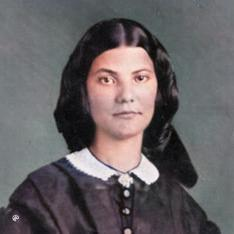

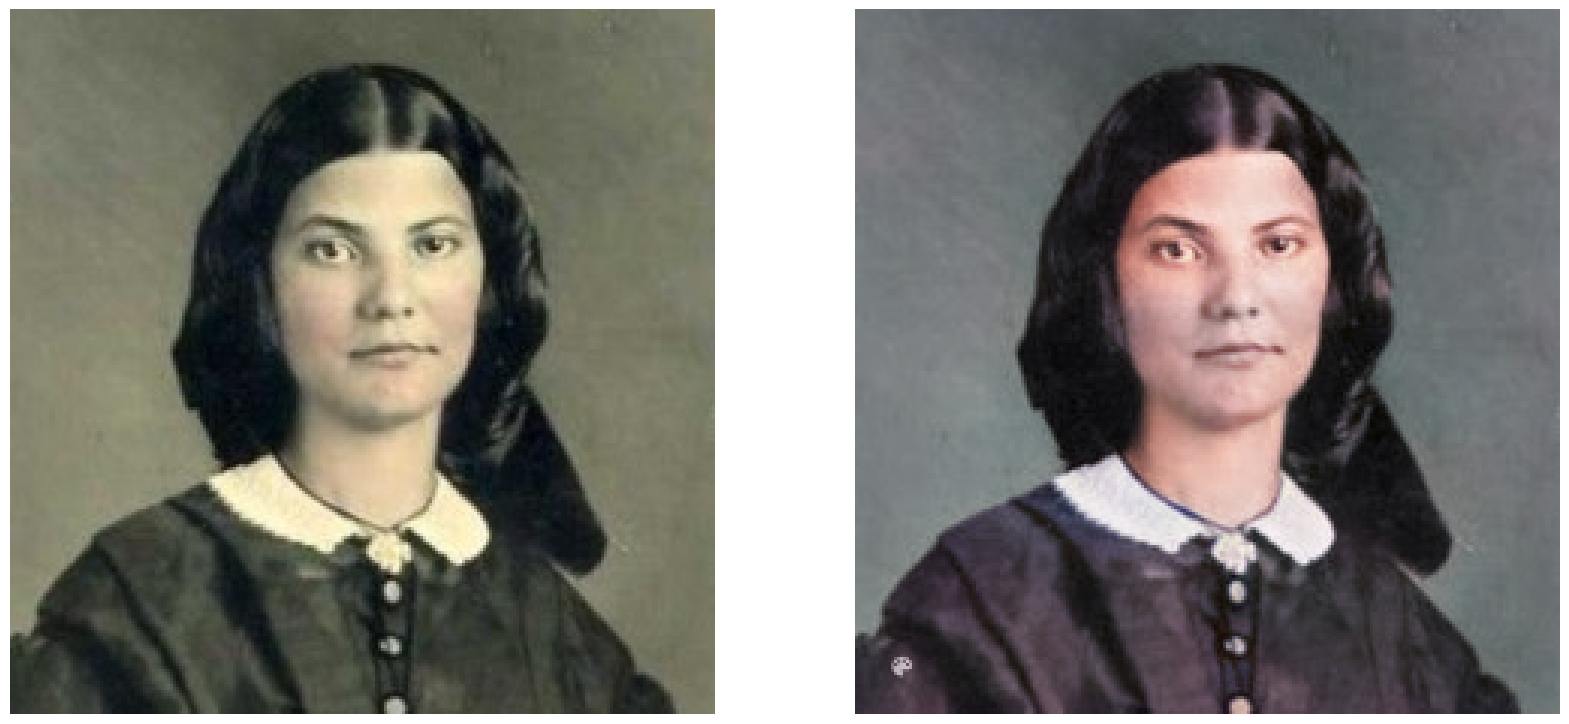

In [ ]:
render_factor = 35
image_path = colorizer.plot_transformed_image(path='/content/drive/MyDrive/Research work CNN Colorization of Art Images/Images/k.jpg', render_factor=render_factor, compare=True)
show_image_in_notebook(image_path)